# Unit 5 - Financial Planning

In [41]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [42]:
# Load .env enviroment variables
load_dotenv("api.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [43]:
# Set current amount of crypto assets

monthly_income = 12000
my_btc = 1.2
my_eth = 5.3

In [44]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [45]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Calculate the total value of your Bitcoin and Ethereum holdings
my_btc_value = my_btc * float(btc_price)
my_eth_value = my_eth * float(eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49539.60
The current value of your 5.3 ETH is $13074.46


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [46]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [47]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [48]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp("2022-01-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2024-01-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.head()

# Reorganize the DataFrame
# Separate ticker data
# Drop the time component of the date
df_ticker.index = df_ticker.index.date
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])



# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()


AGG                                                  \
             close    high     low trade_count      open    volume   
2022-01-18  111.49  111.86  111.47       26119  111.8100   8559221   
2022-01-19  111.73  111.89  111.65       25760  111.7000   9007456   
2022-01-20  111.79  111.90  111.75       21106  111.8400   7530757   
2022-01-21  112.23  112.35  112.11       25112  112.1900   9071578   
2022-01-24  112.10  112.42  112.10       36291  112.3814  12729239   

                           SPY                                        \
                  vwap   close      high     low trade_count    open   
2022-01-18  111.615564  456.49  459.9600  455.31      911800  459.74   
2022-01-19  111.775988  451.75  459.6124  451.46      880792  458.13   
2022-01-20  111.807681  446.75  458.7400  444.50      986095  453.75   
2022-01-21  112.229446  437.98  448.0600  437.95     1882909  445.56   
2022-01-24  112.282408  439.84  440.3800  420.76     3263023  432.03   

                                   
               volume        vwap  
2022-01-18  111733633  457.952260  
2022-01-19  111279125  455.444511  
2022-01-20  125194304  452.265024  
2022-01-21  204630712  442.498960  
2022-01-24  254361526  430.781193

In [49]:
# Pick AGG and SPY close prices

agg_close_price = df_ticker.loc[:, ("AGG", "close")]
spy_close_price = df_ticker.loc[:, ("SPY", "close")]


# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price.iloc[-1]}")
print(f"Current SPY closing price: ${spy_close_price.iloc[-1]}")

Current AGG closing price: $98.09
Current SPY closing price: $472.29


In [50]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price.iloc[-1]
my_spy_value = my_spy * spy_close_price.iloc[-1]

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19618.00
The current value of your 50 SPY shares is $23614.50


In [51]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

savings_data = {
    'amount': [crypto_value, shares_value]
}

index_values = ['crypto', 'shares']

# Create savings DataFrame

df_savings = pd.DataFrame(savings_data, index=index_values)

# Display savings DataFrame
display(df_savings)

,amount
crypto,62614.064
shares,43232.500


<Axes: ylabel='amount'>

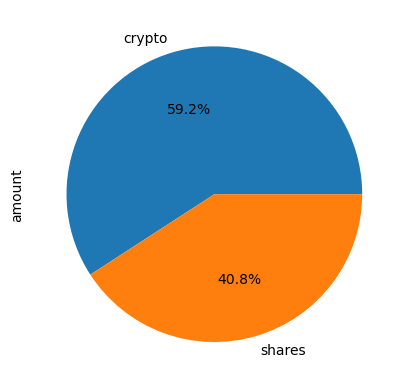

In [52]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', legend=False, autopct='%1.1f%%')


In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
print(f"My ideal emergency fund is ${emergency_fund}")

# Calculate total amount of savings
current_savings = crypto_value + shares_value
current_savings
print(f"My current savings is ${current_savings}")

total_savings = current_savings + emergency_fund
print(f"The total amount of savings is ${total_savings}")

# Validate saving health
if current_savings > emergency_fund:
    print("Congratulations for having enough money in this fund")
    
elif current_savings == emergency_fund:
    print("Congratulating the person on reaching this financial goal")
    
else:
    difference = emergency_fund - current_savings
    print(f"You are ${difference} away from your goal")

My ideal emergency fund is $36000
My current savings is $105846.564
The total amount of savings is $141846.564
Congratulations for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp("2019-01-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2024-01-17", tz="America/New_York").isoformat()

# Sample results may vary from the solution based on the time frame chosen


In [54]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_ticker.head()

AGG                                        \
                            close    high     low trade_count      open   
timestamp                                                                 
2022-01-18 05:00:00+00:00  111.49  111.86  111.47       26119  111.8100   
2022-01-19 05:00:00+00:00  111.73  111.89  111.65       25760  111.7000   
2022-01-20 05:00:00+00:00  111.79  111.90  111.75       21106  111.8400   
2022-01-21 05:00:00+00:00  112.23  112.35  112.11       25112  112.1900   
2022-01-24 05:00:00+00:00  112.10  112.42  112.10       36291  112.3814   

                                                    SPY                    \
                             volume        vwap   close      high     low   
timestamp                                                                   
2022-01-18 05:00:00+00:00   8559221  111.615564  456.49  459.9600  455.31   
2022-01-19 05:00:00+00:00   9007456  111.775988  451.75  459.6124  451.46   
2022-01-20 05:00:00+00:00   7530757  111.807681  446.75  458.7400  444.50   
2022-01-21 05:00:00+00:00   9071578  112.229446  437.98  448.0600  437.95   
2022-01-24 05:00:00+00:00  12729239  112.282408  439.84  440.3800  420.76   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2022-01-18 05:00:00+00:00      911800  459.74  111733633  457.952260  
2022-01-19 05:00:00+00:00      880792  458.13  111279125  455.444511  
2022-01-20 05:00:00+00:00      986095  453.75  125194304  452.265024  
2022-01-21 05:00:00+00:00     1882909  445.56  204630712  442.498960  
2022-01-24 05:00:00+00:00     3263023  432.03  254361526  430.781193

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-01-17 05:00:00+00:00  106.43  106.5300  106.3350       16073  106.53   
2019-01-18 05:00:00+00:00  106.35  106.4799  106.2803       15670  106.37   
2019-01-22 05:00:00+00:00  106.44  106.6200  106.4400       16570  106.44   
2019-01-23 05:00:00+00:00  106.55  106.5900  106.3700       11639  106.38   
2019-01-24 05:00:00+00:00  106.73  106.8400  106.6700       14633  106.72   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-01-17 05:00:00+00:00  5764144  106.447913          NaN  263.00  263.92   
2019-01-18 05:00:00+00:00  5618943  106.342846    -0.000752  266.42  266.98   
2019-01-22 05:00:00+00:00  7065826  106.528223     0.000846  262.94  265.06   
2019-01-23 05:00:00+00:00  3473856  106.504969     0.001033  263.35  264.79   
2019-01-24 05:00:00+00:00  7961374  106.741608     0.001689  263.60  264.20   

                                                                               \
                               low trade_count    open     volume        vwap   
timestamp                                                                       
2019-01-17 05:00:00+00:00  259.960      384971  260.01   97376854  262.073905   
2019-01-18 05:00:00+00:00  262.998      444155  264.98  130617796  265.710925   
2019-01-22 05:00:00+00:00  261.060      522147  264.82  117524932  262.946887   
2019-01-23 05:00:00+00:00  260.660      445442  264.01   87913109  262.805970   
2019-01-24 05:00:00+00:00  262.080      315574  263.21   61342224  263.264945   

                                        
                          daily_return  
timestamp                               
2019-01-17 05:00:00+00:00          NaN  
2019-01-18 05:00:00+00:00     0.013004  
2019-01-22 05:00:00+00:00    -0.013062  
2019-01-23 05:00:00+00:00     0.001559  
2019-01-24 05:00:00+00:00     0.000949

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 110.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 120.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 130.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 140.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 150.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 160.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 170.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 180.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 190.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 200.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 210.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 220.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 230.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 240.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 250.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 260.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 270.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 280.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 290.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 300.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 310.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 320.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 330.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 340.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 350.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 360.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 370.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 380.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 390.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 400.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 410.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 420.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 430.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 440.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 450.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 460.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 470.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 480.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Running Monte Carlo simulation number 490.


/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/helobonetti/Desktop/BERKELEY/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002710,1.000105,0.999857,0.999437,1.010213,0.998539,0.992579,1.001239,1.003567,0.996594,...,0.991510,0.989530,1.004773,1.002782,0.989827,1.018243,1.002822,0.990740,1.015405,1.001316
2,1.010066,0.994897,1.013224,0.985841,1.002734,1.003498,1.000169,1.001229,0.998370,1.006976,...,0.969189,0.983200,1.004806,1.009162,0.983333,1.023282,0.992544,0.985704,1.011094,1.004365
3,0.999377,0.994728,1.004307,0.990450,1.004357,1.001208,0.985850,1.002687,0.992573,0.999611,...,0.982247,0.973485,1.006319,1.001061,0.982118,1.021947,1.008912,0.991123,1.033198,1.002985
4,1.020423,1.012035,0.999774,0.991204,0.997157,0.994739,0.992370,0.996022,0.989117,0.993568,...,0.981444,0.980661,1.008699,0.992962,0.986341,1.019987,1.015419,0.999402,1.039569,1.022089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.012787,6.264516,19.523307,15.606071,11.053552,5.497167,6.821880,8.491649,6.825916,19.761071,...,6.826218,17.792883,10.388260,31.795871,4.655835,4.682834,5.036163,3.461455,13.961072,11.168607
7557,4.975110,6.253020,19.585265,15.730669,11.059783,5.504926,6.836022,8.421299,6.877322,19.711258,...,6.799809,17.632749,10.272855,31.696414,4.695169,4.657009,5.078327,3.462117,14.052138,11.294746
7558,4.873824,6.291227,19.833284,15.559532,11.155647,5.570446,6.881117,8.500939,6.946120,19.670237,...,6.860620,17.580603,10.205013,32.048669,4.780471,4.600051,4.995187,3.435901,14.283689,11.330574
7559,4.921586,6.295181,19.920039,15.576329,11.203263,5.624473,6.887023,8.513829,6.967851,19.854562,...,6.772355,17.708666,10.132934,31.819607,4.843180,4.559392,4.942389,3.395125,14.185750,11.300829


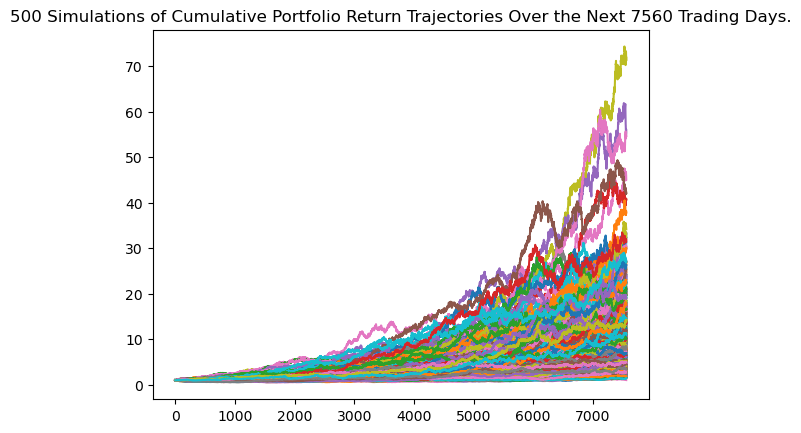

In [29]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

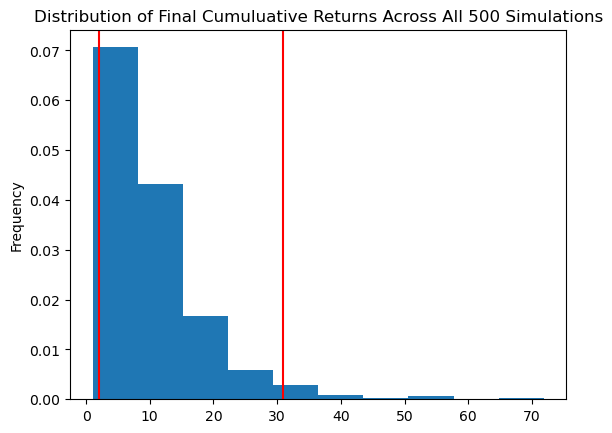

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             10.331079
std               7.721281
min               1.112159
25%               5.046201
50%               7.763171
75%              13.633019
max              60.819680
95% CI Lower      2.499585
95% CI Upper     29.675527
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49991.7 and $593510.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*3000,2)

# Print the simulation input data
print("Simulation Input Data:")


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

Simulation Input Data:
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $74987.55 and $89026.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")